<a href="https://colab.research.google.com/github/wallik2/heart-failure-detector/blob/pipeline-train/Heart_Failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Failure prediction

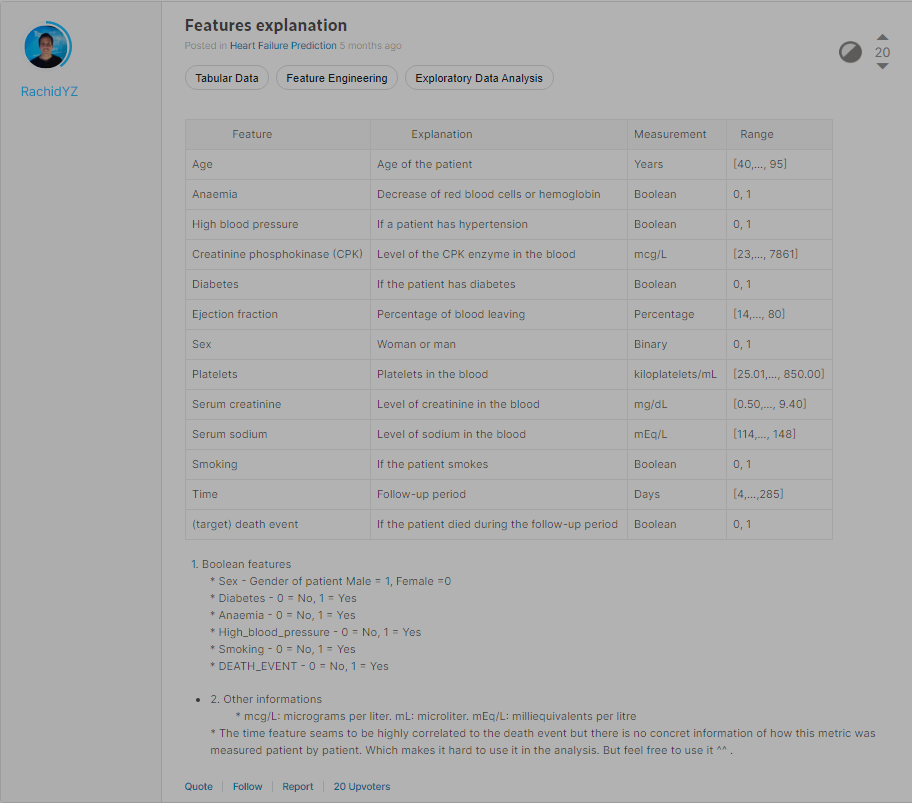

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

from copy import deepcopy

In [ ]:
Heart_Data = pd.read_csv("/content/drive/MyDrive/dataset/heart_failure_clinical_records_dataset.csv")

In [ ]:
# Target : DEATH_EVENT

'sex' column suspected<br>

Alternative1: Keep 'sex' column the same <br>
Alternative2: Extract "sex" to OneHotEncoder <br>
Alternative3: Label Encoding but Female =1, Male=0 (if the model is better then Female have higher risk of having heart failure)

Model1: Logistic Regression <br>
Model2: Support Vector machine <br>
Model3: K-nearest neighbor <br>
Model4: Random forest classifier 

Suspect havinf more coluumn : age 40+ : True or False



---



# 1. Data Exploration

In [ ]:
Heart_Data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Check missing value

Heart_Data.isnull().sum(axis = 0)

# None!!

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
Heart_Data['anaemia'].unique()

array([0, 1])

In [ ]:
Heart_Data.astype({"age": int, "platelets": int,"serum_creatinine":float})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


In [ ]:
Heart_Data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

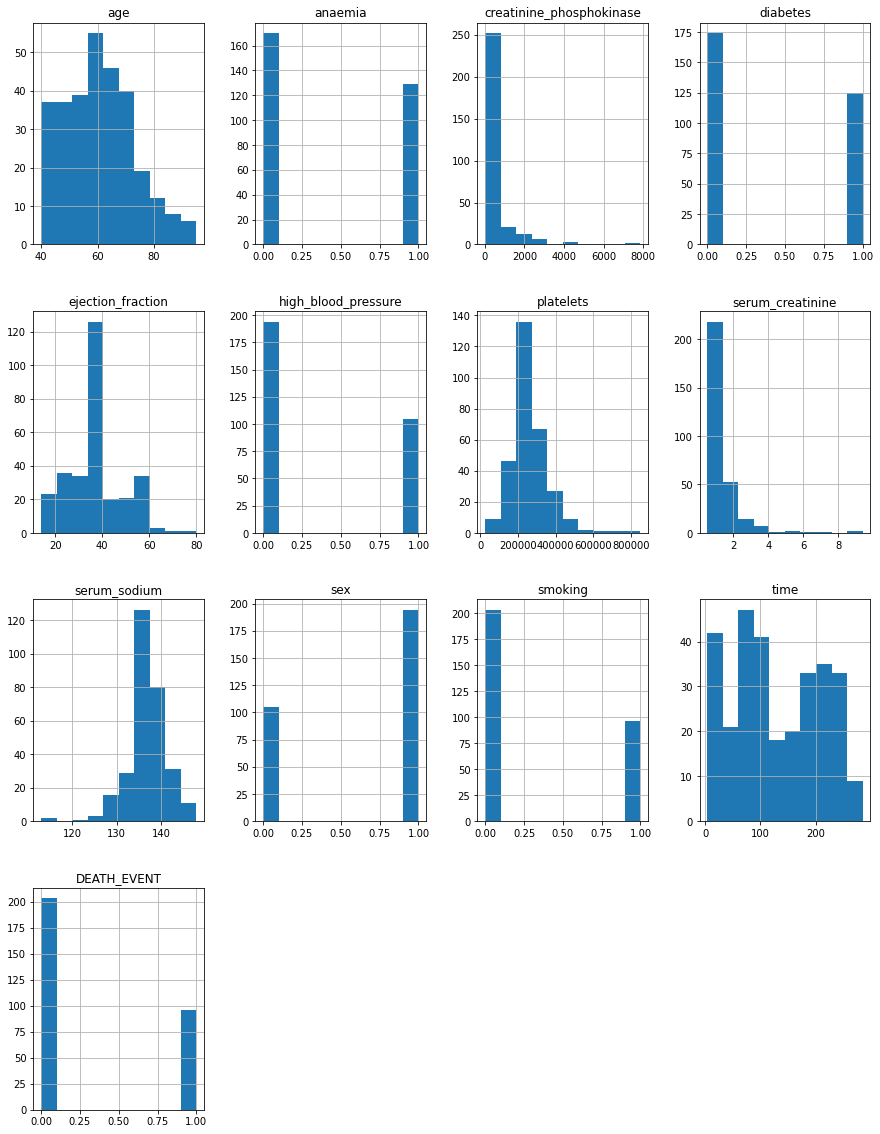

In [ ]:
Heart_Data.hist(bins=10, figsize= (15,20))

plt.show()

In [ ]:
map_df = deepcopy(Heart_Data)
map_df.replace({'sex':{0:'Female',1:'Male'}} , inplace = True) 
map_df.replace({0:False,1:True},inplace=True)


In [ ]:
for i in map_df.columns:
  print(i)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=13)


for c,i in enumerate(map_df.columns):
  print(c)
  fig.add_trace(
      go.Histogram(x=map_df[i]),row=1,col=c+1)
      
  #fig = px.histogram(map_df,x=i,
  #            barmode='group')
  #fig.update_layout(title='f')
fig.show()



#fig.update_layout(title='f')

0
1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
fig = go.Figure(go.Histogram(x=map_df['age']))
fig.show()

In [ ]:
def count_percentage(x):
  m = x.count() 
  return m

df['%'] = 100 * df['sales'] / df.groupby('state')['sales'].transform('sum')
#agg_criteria = {'DEATH_EVENT':'count'}
#group = map_df.groupby(['smoking','DEATH_EVENT']).agg([count_percentage])
map_df.groupby(['smoking'])['DEATH_EVENT'].transform(lambda x: x/x.sum())
#group['DEATH_EVENT_PERCENTAGE']

0      0.015152
1      0.015152
2      0.033333
3      0.015152
4      0.015152
         ...   
294    0.000000
295    0.000000
296    0.000000
297    0.000000
298    0.000000
Name: DEATH_EVENT, Length: 299, dtype: float64



---



# 2. Data Preparation

In [ ]:
# split training & testing data

from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(Heart_Data, test_size=0.2, random_state=42) 

based on this video https://www.youtube.com/watch?v=mnKm3YP56PY: he suggested to use standardization to perform machine learning, also the distribution of this graph seems pretty close to Guassian distribution

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [ ]:
X = train_set.iloc[:,:-1]
y = train_set.iloc[:,-1]

In [ ]:
X.reset_index(drop=True,inplace=True)

y.reset_index(drop=True,inplace=True)

In [ ]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
1,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
2,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
3,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
4,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
234,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
235,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71
236,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88
237,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244


In [ ]:
y

0      1
1      1
2      1
3      0
4      1
      ..
234    0
235    0
236    0
237    0
238    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [ ]:
scaler = StandardScaler()

X_tr = scaler.fit_transform(X)

X_tr



array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.74293206,
        -0.67625223, -1.56416577],
       [ 1.16420244, -0.87770745, -0.50593309, ...,  0.74293206,
        -0.67625223,  0.37989712],
       [-0.03281933,  1.13933179, -0.50064183, ...,  0.74293206,
        -0.67625223,  0.4950061 ],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.74293206,
        -0.67625223, -0.56655455],
       [-1.42476533, -0.87770745,  0.0052027 , ...,  0.74293206,
         1.4787382 ,  1.42866789],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  0.74293206,
         1.4787382 , -0.57934444]])

In [ ]:
X_tr = pd.DataFrame(X_tr)

train_set_tr = X_tr.join(y)

train_set_tr.columns = Heart_Data.columns

In [ ]:
train_set_tr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.164202,1.139332,-0.350370,-0.826498,-2.000867,-0.736163,-1.439568,-0.188705,0.131259,0.742932,-0.676252,-1.564166,1
1,1.164202,-0.877707,-0.505933,-0.826498,-0.022672,1.358395,-0.408476,1.120602,-0.545811,0.742932,-0.676252,0.379897,1
2,-0.032819,1.139332,-0.500642,1.209925,-0.710740,-0.736163,1.345442,0.113442,-0.094431,0.742932,-0.676252,0.495006,1
3,-0.756645,-0.877707,-0.471011,-0.826498,-0.710740,-0.736163,-0.472255,-0.692285,-0.094431,0.742932,1.478738,-0.259597,0
4,2.750989,-0.877707,0.005203,1.209925,-0.022672,1.358395,0.009892,0.445805,-0.545811,0.742932,-0.676252,-1.346738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.032819,1.139332,-0.450904,1.209925,0.149345,1.358395,-0.652962,-0.390137,-0.094431,-1.346018,-0.676252,0.507796,0
235,-0.255554,-0.877707,0.005203,1.209925,-0.280697,-0.736163,-1.492717,-0.490853,0.582639,0.742932,1.478738,-0.783983,0
236,-0.506099,-0.877707,0.180873,-0.826498,0.579388,-0.736163,0.006086,-0.087989,0.131259,0.742932,-0.676252,-0.566555,0
237,-1.424765,-0.877707,0.005203,1.209925,-0.710740,1.358395,0.009892,0.214158,-1.448572,0.742932,1.478738,1.428668,0


Now we have 2 versions training set dataset; original & standardized

In [ ]:
train_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162,1
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112,0
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172,0
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71,0
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244,0


In [ ]:
train_set_tr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.164202,1.139332,-0.350370,-0.826498,-2.000867,-0.736163,-1.439568,-0.188705,0.131259,0.742932,-0.676252,-1.564166,1
1,1.164202,-0.877707,-0.505933,-0.826498,-0.022672,1.358395,-0.408476,1.120602,-0.545811,0.742932,-0.676252,0.379897,1
2,-0.032819,1.139332,-0.500642,1.209925,-0.710740,-0.736163,1.345442,0.113442,-0.094431,0.742932,-0.676252,0.495006,1
3,-0.756645,-0.877707,-0.471011,-0.826498,-0.710740,-0.736163,-0.472255,-0.692285,-0.094431,0.742932,1.478738,-0.259597,0
4,2.750989,-0.877707,0.005203,1.209925,-0.022672,1.358395,0.009892,0.445805,-0.545811,0.742932,-0.676252,-1.346738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.032819,1.139332,-0.450904,1.209925,0.149345,1.358395,-0.652962,-0.390137,-0.094431,-1.346018,-0.676252,0.507796,0
235,-0.255554,-0.877707,0.005203,1.209925,-0.280697,-0.736163,-1.492717,-0.490853,0.582639,0.742932,1.478738,-0.783983,0
236,-0.506099,-0.877707,0.180873,-0.826498,0.579388,-0.736163,0.006086,-0.087989,0.131259,0.742932,-0.676252,-0.566555,0
237,-1.424765,-0.877707,0.005203,1.209925,-0.710740,1.358395,0.009892,0.214158,-1.448572,0.742932,1.478738,1.428668,0




---



# 3. Model trainIng data

*Model1*: Logistic Regression <br>
Model2: Support Vector Classifier <br>
Model3: K-nearest neighbor <br>
Model4: Random forest classifier 

In [ ]:
def perf_score(score):
  
  score *= 100

  if score == 100:
    return("Perfect or overfitting?")

  elif score >= 98:
    return("Flawless")

  elif score >= 95:
    return("Outstanding")
  
  elif score >= 90:
    return("Excellent")
  
  elif score >= 85:
    return("Great")
  
  elif score >= 80:
    return("Good")
  
  elif score >= 70:
    return("Normal")

  else:
    return("Not acceptable")


In [ ]:
# Must do K-Fold Cross Validation first

from sklearn.model_selection import cross_val_predict





---



1) Logistic Regression

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
train_set_tr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.164202,1.139332,-0.350370,-0.826498,-2.000867,-0.736163,-1.439568,-0.188705,0.131259,0.742932,-0.676252,-1.564166,1
1,1.164202,-0.877707,-0.505933,-0.826498,-0.022672,1.358395,-0.408476,1.120602,-0.545811,0.742932,-0.676252,0.379897,1
2,-0.032819,1.139332,-0.500642,1.209925,-0.710740,-0.736163,1.345442,0.113442,-0.094431,0.742932,-0.676252,0.495006,1
3,-0.756645,-0.877707,-0.471011,-0.826498,-0.710740,-0.736163,-0.472255,-0.692285,-0.094431,0.742932,1.478738,-0.259597,0
4,2.750989,-0.877707,0.005203,1.209925,-0.022672,1.358395,0.009892,0.445805,-0.545811,0.742932,-0.676252,-1.346738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.032819,1.139332,-0.450904,1.209925,0.149345,1.358395,-0.652962,-0.390137,-0.094431,-1.346018,-0.676252,0.507796,0
235,-0.255554,-0.877707,0.005203,1.209925,-0.280697,-0.736163,-1.492717,-0.490853,0.582639,0.742932,1.478738,-0.783983,0
236,-0.506099,-0.877707,0.180873,-0.826498,0.579388,-0.736163,0.006086,-0.087989,0.131259,0.742932,-0.676252,-0.566555,0
237,-1.424765,-0.877707,0.005203,1.209925,-0.710740,1.358395,0.009892,0.214158,-1.448572,0.742932,1.478738,1.428668,0


In [ ]:
X = train_set_tr.iloc[:,:-1]
y = train_set_tr.iloc[:,-1]

In [ ]:
Logistic_R = LogisticRegression(random_state=0)

#Logistic_R.fit(X,y)
#y_pred = Logistic_R.predict(X)

In [ ]:
type(X.columns)

pandas.core.indexes.base.Index

Evaluation (f1 score)


In [ ]:
y_pred = cross_val_predict(Logistic_R, X, y, cv=3)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import f1_score

accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Logistic Regresion is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Logistic Regresion is  0.8242677824267782

The performance is Good


Performance : <font color='lime'>Good </font>



---



2) Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

2.1 kernel = rbf

In [ ]:
svm_clf = SVC(kernel='rbf')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.7866108786610879

The performance is Normal


2.2 kernel = linear

In [ ]:
svm_clf = SVC(kernel='linear')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.8075313807531381

The performance is Good


2.3 poly (degree3)

In [ ]:
svm_clf = SVC(kernel='poly',degree=3)

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.7615062761506276

The performance is Normal


Kernel = Linear is the best



---



3. K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K_Nearest = KNeighborsClassifier(n_neighbors=5)

y_pred = cross_val_predict(K_Nearest, X, y, cv=3)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of K-Nearest Neightbor is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of K-Nearest Neightbor is  0.7656903765690377

The performance is Normal




---



4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf= RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(forest_clf, X, y, cv=3)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Random forest classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Random forest classifier is  0.8661087866108786

The performance is Great




---



1 st place: Random Forest Classifier (0.8661)<br>
2 nd place: Logistic Regression (0.8243)<br>
3 rd place: Support vector Classifier [Linear kernel] (0.8075)



---



# 4. Fine-Tuning (Random Forest)

We plan to Fine tuning Random forest classifier!

ref: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

N_estimators = [i for i in range(10,201,10)]

Max_features = [2,4,6,8,10,'auto', 'sqt']
#Min_samples_leaf= [1, 2, 4]
#Min_samples_split= [2, 5, 10]
#Max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

In [ ]:
random_grid = [
    {'bootstrap': [False,True],'n_estimators': N_estimators, 'max_features':Max_features}]
   #  ,'max_depth': Max_depth,'min_samples_leaf' :Min_samples_leaf, 'min_samples_split':Min_samples_split}


forest_clf= RandomForestClassifier(random_state=42)

#None = Auto (based on the impurity)

# 2*20*7 = 280

In [ ]:
random_search = RandomizedSearchCV(forest_clf, random_grid, cv=5, n_iter=120,
                          scoring='f1',
                          return_train_score = True)

In [ ]:
random_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=120,
                   param_distributions=[{'bootstrap': [False, True],
                                         'max_features': [2, 4, 6, 8, 10,
                                                          'auto', 'sqt'],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, 120, 130, 140,
                                                          150, 160, 170, 180,
                                                          190, 200]}],
                   return_train_score=True, scoring='f1')

In [ ]:
random_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
random_search.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 170}



---



Let's get more advanced ! using Grid search

to {'bootstrap': True, 'max_features': 4, 'n_estimators': 50}

In [ ]:
N_estimators = [i for i in range(160,181)]

Max_features = ['auto','sqrt']

In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [False,True],'n_estimators': N_estimators, 'max_features':Max_features},
]

forest_clf= RandomForestClassifier(random_state=42)

# Ietration= 2*8*6= 96

In [ ]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='f1',
                          return_train_score = True)

In [ ]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [160, 161, 162, 163, 164, 165, 166,
                                           167, 168, 169, 170, 171, 172, 173,
                                           174, 175, 176, 177, 178, 179,
                                           180]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 163}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=163, random_state=42)

Best Hyperparameters for random forest classifier : {bootstrap=True,'max_features': 'auto', 'n_estimators': 163}

In [ ]:
forest_clf= RandomForestClassifier(bootstrap=True, max_features = 'auto', n_estimators=100, random_state=42)

y_pred = cross_val_predict(forest_clf, X, y, cv=5)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Random forest classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

# It looks like the accuracy is lower than the old one which is about 0.8661 (default: n_estimators = 100)

The Accuracy of Random forest classifier is  0.8828451882845189

The performance is Great


Let do it again the best estimator must be located around 100



---



In [ ]:
N_estimators = [i for i in range(80,120)]

In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [False,True],'n_estimators': N_estimators, 'max_features':Max_features},
]

forest_clf= RandomForestClassifier(random_state=42)

# Ietration= 2*8*6= 96

In [ ]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='f1',
                          return_train_score = True)

In [ ]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88,
                                           89, 90, 91, 92, 93, 94, 95, 96, 97,
                                           98, 99, 100, 101, 102, 103, 104, 105,
                                           106, 107, 108, 109, ...]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 89}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=89, random_state=42)

In [ ]:
Score = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
Score.iloc[159,2]

{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 119}

In [ ]:
Score.sort_values(by='mean_test_score',inplace=True)


In [ ]:
Score

,mean_test_score,std_test_score,params
0,0.745248,0.067368,"{'bootstrap': False, 'max_features': 'auto', '..."
40,0.745248,0.067368,"{'bootstrap': False, 'max_features': 'sqrt', '..."
1,0.752560,0.080796,"{'bootstrap': False, 'max_features': 'auto', '..."
2,0.752560,0.080796,"{'bootstrap': False, 'max_features': 'auto', '..."
3,0.752560,0.080796,"{'bootstrap': False, 'max_features': 'auto', '..."
...,...,...,...
133,0.816457,0.080302,"{'bootstrap': True, 'max_features': 'sqrt', 'n..."
132,0.816457,0.080302,"{'bootstrap': True, 'max_features': 'sqrt', 'n..."
131,0.816457,0.080302,"{'bootstrap': True, 'max_features': 'sqrt', 'n..."
129,0.816457,0.080302,"{'bootstrap': True, 'max_features': 'sqrt', 'n..."


In [ ]:
Score.iloc[159,1]

0.08030157843463624

In [ ]:
Highest_score = Score[Score.mean_test_score == Score.mean_test_score.max()]

In [ ]:
for i in Highest_score.params:
  print(i)

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 91}
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 92}
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 93}
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 89}
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 94}
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 90}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 94}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 93}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 92}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 91}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 89}
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 90}


This shows that it's not enough to set just n_estimators to obtain the best hyperparameter, we will investigate more on min_sample_leaf, min_sample_split



---



In [ ]:
forest_clf= RandomForestClassifier(bootstrap=True, max_features = 'auto', n_estimators=89, random_state=42)

y_pred = cross_val_predict(forest_clf, X, y, cv=3)

In [ ]:
forest_clf.fit(X.values,y.values)

RandomForestClassifier(n_estimators=89, random_state=42)

In [ ]:
forest_clf.predict(X.values)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
forest_clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Random forest classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))


The Accuracy of Random forest classifier is  0.8661087866108786

The performance is Great


In [ ]:
#the score of n_estimator =100 and 89 are equal -> but the result show that 89 do better than 100 (maybe because that it perform better thought cross validation)



---



# Conclusion

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_rf  = Pipeline([('Scaler',scaler),
                         ('RandomForest', forest_clf)
                         ])

In [ ]:
scaler

StandardScaler()

In [ ]:
# Test set

y_test = test_set.pop('DEATH_EVENT')
X_test = test_set

In [ ]:
X_test.iloc[1].values

array([5.00e+01, 1.00e+00, 2.98e+02, 0.00e+00, 3.50e+01, 0.00e+00,
       3.62e+05, 9.00e-01, 1.40e+02, 1.00e+00, 1.00e+00, 2.40e+02])

In [ ]:
y_test_pred = pipeline_rf.predict(X_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


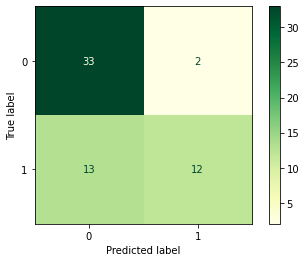

In [ ]:
plot_confusion_matrix(pipeline_rf,
                      X_test.values,
                      y_test.values,
                      cmap = 'YlGn')

In [ ]:
accuracy_score(y_test_pred,y_test.values)

0.55

In [ ]:
from pickle import dump
dump(pipeline_rf,open('model.pkl', 'wb'))


Visualize

In [ ]:
from sklearn.tree import export_graphviz
import os 
import graphviz

tree_order = 88
X_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

dt_file = export_graphviz(forest_clf.estimators_[tree_order],
                          feature_names=X_col,
                          filled=True,
                          rounded=True)

#os.system('dot -Tpng tree.dot -o tree.png')

In [ ]:
graph = graphviz.Source(dt_file)
graph.render(f'dtree_render {tree_order}',view=True,format='png')

'dtree_render 88.png'

In [ ]:
from sklearn import set_config

set_config(display="diagram")

pipeline_rf

Pipeline(steps=[('Scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestClassifier(n_estimators=89, random_state=42))])

In [ ]:
from sklearn.utils import estimator_html_repr
with open('my_estimator.html', 'w') as f:  
     f.write(estimator_html_repr(pipeline_rf))